In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sparse_rf.algs.core import min_wl2, min_l2
from sparse_rf.modules import make_X, make_W, make_A
from sparse_rf.util import *

In [2]:
m = 1000
d = 5
q = 2

ratio_train = 0.75

def make_D(W):
    norm = np.linalg.norm(W, axis=1)**2
    weight = np.concatenate((norm, norm), axis=-1)
    D = np.diag(1.0/weight**4)
    return D

In [3]:
X = make_X(d, m, dist=sphere)
X_train = X[:int(m*ratio_train), :]
X_test = X[int(m*ratio_train):, :]

In [4]:
b = np.random.randn(d)
b /= np.linalg.norm(b)
y = np.matmul(X, b) + 0.1
y_train = y[:int(m*ratio_train)]
y_test = y[int(m*ratio_train):]

In [5]:
ns = np.arange(25, 2100, 25)

In [6]:
results_l2 = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, 1, dist=normal) for _ in range(n)]
        A_trains = [make_A(X_train, W, active=relu) for W in Ws]
        A_tests = [make_A(X_test, W, active=relu) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_test_ensemble = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_test_ensemble-y_test) / len(y_test))

    results_l2.append(res)

In [7]:
results_wl2 = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, 1, dist=normal) for _ in range(n)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=fourier) for W in Ws]
        A_tests = [make_A(X_test, W, active=fourier) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_test_ensemble = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_test_ensemble-y_test) / len(y_test))

    results_wl2.append(res)

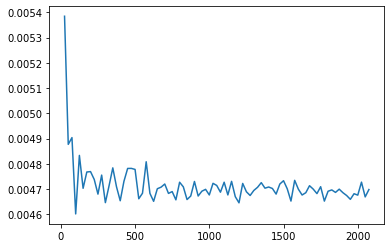

In [9]:
plt.plot(ns, [np.mean(res) for res in results_l2])

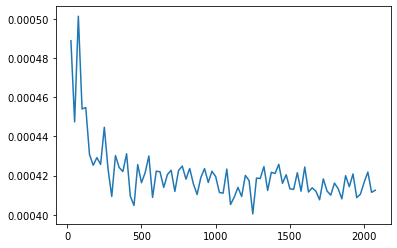

In [10]:
plt.plot(ns, [np.mean(res) for res in results_wl2])